# Intro to SQL, Part 2
**Learning Objective:** 
- Practice using functions and aggregate GROUP BY queries, especially MIN(), MAX(), AVG(), COUNT(), SUM()
- Continue practicing SELECT statements

❗**TODO:** Add a Markdown block below. Put the names of both partners there.

Below is the ERD for the Database we will be practicing with. (Chinook.db)

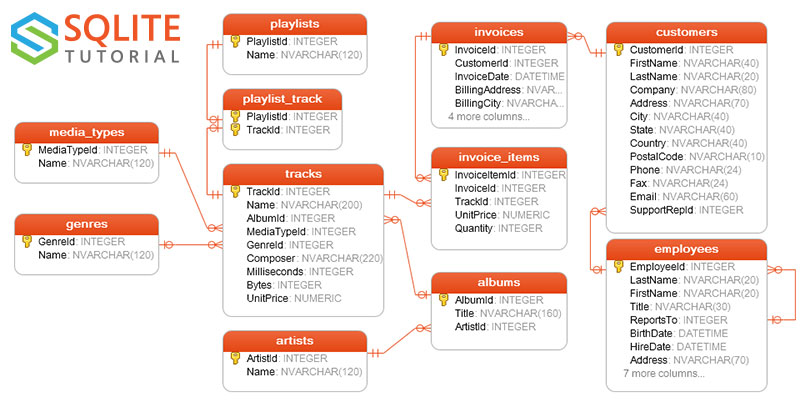

## Setup

*This is already done for you.* First, we install the python requirements from **requirements.txt**. There's lot of libraries, but most importantly, this installs the  **ipython-sql** library that enables SQL execution in Jupyter Notebooks and an older version of SQLAlchemy (1.4.46) that works with Codespaces.

❗ The command ```**%load_ext sql**``` is used to activate sql in Jupyter.

❗ The command ```**%sql sqlite:///<database_name>.db**``` is used to select the working database. (Note 3 slashes!)



In [2]:
# Start the Jupyter SQL engine, connecting to a SQLite database 
%reload_ext sql 
%sql sqlite:///chinook.db

# Exercises - GROUP BY

#### Ex. 1 - COUNT()
How many tracks did each composer write? Show the name of the composer and the number of songs. (in Tracks table)


In [10]:
%%sql
SELECT composer, count("TrackId") AS "Number of Songs" FROM tracks GROUP BY "Composer" ORDER BY "Number of Songs" DESC LIMIT 10


 * sqlite:///chinook.db
Done.


Composer,Number of Songs
None,978
Steve Harris,80
U2,44
Jagger/Richards,35
Billy Corgan,31
Kurt Cobain,26
Bill Berry-Peter Buck-Mike Mills-Michael Stipe,25
The Tea Party,24
Miles Davis,23
Gilberto Gil,23


**Tips:** Dealing with Null values - Use the [COALESCE function](https://www.postgresqltutorial.com/postgresql-tutorial/postgresql-coalesce/) to return an alternative non-null value. For example 
`coalesce(composer, 'Unknown')` 

In [5]:
%%sql
-- run this cell to try it out!
SELECT trackid, name, composer, coalesce(composer, 'Unknown') 
FROM tracks
WHERE composer IS null
 

 * sqlite:///chinook.db
(sqlite3.OperationalError) near "d": syntax error
[SQL: -- run this cell to try it out!
SELECT trackid, name, composer, coalesce(composer, 'Unknown') 
FROM tracks
WHERE composer IS null d]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


#### Ex. 2 
How many songs did each composer write in each genre? Show missing composers as "Unknown"

_(hint: group by both composer and genre)_


In [12]:
%%sql
SELECT
    COALESCE(Composer, 'Unknown') as Composer,
    Genres.Name as Genre,
    COUNT(Tracks.TrackId) as SongCount
FROM
    tracks 
LEFT JOIN Genres ON Tracks.GenreId = Genres.GenreId
GROUP BY
    Composer,
    Genre
ORDER BY
    Composer,
    Genre


 * sqlite:///chinook.db
Done.


Composer,Genre,SongCount
"A. F. Iommi, W. Ward, T. Butler, J. Osbourne",Metal,3
A. Jamal,Jazz,1
A.Bouchard/J.Bouchard/S.Pearlman,Metal,1
A.Isbell/A.Jones/O.Redding,Blues,1
AC/DC,Rock,8
Aaron Copland,Classical,1
Aaron Goldberg,Jazz,1
Ace Frehley,Rock,2
"Acyi Marques/Arlindo Bruz/Braço, Beto Sem/Zeca Pagodinho",Latin,1
Acyr Marques/Arlindo Cruz/Franco,Latin,1


#### Ex. 3 - SUM()
Who are the top 5 composers who wrote the most music, by length of time? Show time in minutes.  

In [19]:
%%sql
SELECT IFNULL(Composer, 'Unknown') as Composer, SUM(Milliseconds/1000/60) AS "Minutes" FROM tracks GROUP BY Composer ORDER BY "Minutes" DESC LIMIT 5

 * sqlite:///chinook.db
Done.


Composer,Minutes
Unknown,11098
Steve Harris,413
U2,162
Miles Davis,139
Jagger/Richards,125


#### Ex. 4 - MAX()
What is the longest song? Show the track name, composer, and time in minutes.

In [21]:
%%sql

SELECT Name, IFNULL(Composer, 'Unknown') as Composer, MAX(Milliseconds/1000/60) AS "Minutes" FROM tracks

 * sqlite:///chinook.db
Done.


Name,Composer,Minutes
Occupation / Precipice,Unknown,88


#### Ex. 5 - HAVING
Show how many songs each composer wrote in each genre, excluding unknown composers and those who wrote less than 5 songs.

In [5]:
%%sql
SELECT
    Composer,
    Genres.Name as Genre,
    COUNT(Tracks.TrackId) as SongCount
FROM
    tracks 
JOIN Genres ON Tracks.GenreId = Genres.GenreId
WHERE Composer IS NOT NULL
GROUP BY
    Composer,
    Genre
HAVING SUM(Milliseconds/1000/60)>=5
ORDER BY
    Composer,
    Genre



 * sqlite:///chinook.db
Done.


Composer,Genre,SongCount
"A. F. Iommi, W. Ward, T. Butler, J. Osbourne",Metal,3
A.Bouchard/J.Bouchard/S.Pearlman,Metal,1
AC/DC,Rock,8
Ace Frehley,Rock,2
"Adam Clayton, Bono, Larry Mullen & The Edge",Rock,11
"Adam Clayton, Bono, Larry Mullen, The Edge",Rock,11
Adrian Smith,Metal,5
Adrian Smith/Bruce Dickinson,Metal,5
Adrian Smith/Bruce Dickinson,Rock,1
Adrian Smith/Bruce Dickinson/Nicko McBrain,Heavy Metal,1


## Practice - Write your Own!
Using any of the other tables in Chinook, write 3 meaningful queries that use GROUP BY to show statistics about the data. 

Please include the question your query is designed to answer.  

#### Question 1
What is the average sale amount per country?

In [6]:
%%sql
SELECT
    BillingCountry AS Country,
    AVG(Total) AS AverageSaleAmount
FROM
    invoices
GROUP BY
    BillingCountry
ORDER BY
    AverageSaleAmount DESC


 * sqlite:///chinook.db
Done.


Country,AverageSaleAmount
Chile,6.659999999999999
Ireland,6.517142857142857
Hungary,6.517142857142857
Czech Republic,6.445714285714287
Austria,6.088571428571428
Finland,5.945714285714287
Netherlands,5.8028571428571425
India,5.789230769230769
USA,5.747912087912091
Norway,5.659999999999999


#### Question 2
What is the total sales revenue per album?

In [4]:
%%sql
SELECT
    al.Title AS Album,
    SUM(inv.UnitPrice * inv.Quantity) AS TotalRevenue
FROM
    invoice_items inv
JOIN
    tracks tr ON inv.TrackId = tr.TrackId
JOIN
    albums al ON tr.AlbumId = al.AlbumId
GROUP BY
    al.AlbumId
ORDER BY
    TotalRevenue DESC



 * sqlite:///chinook.db
Done.


Album,TotalRevenue
"Battlestar Galactica (Classic), Season 1",35.81999999999999
"The Office, Season 3",31.83999999999999
Minha Historia,26.729999999999986
"Heroes, Season 1",25.869999999999994
"Lost, Season 2",25.869999999999994
Greatest Hits,25.739999999999988
Unplugged,24.74999999999999
"Battlestar Galactica, Season 3",23.879999999999995
"Lost, Season 3",21.889999999999997
Acústico,21.779999999999994


#### Question 3
What is the average track length (in minutes) per genre?

In [5]:
%%sql 
SELECT
    g.Name AS Genre,
    AVG(tr.Milliseconds) / 60000.0 AS AverageTrackLengthMinutes
FROM
    tracks tr
JOIN
    genres g ON tr.GenreId = g.GenreId
GROUP BY
    g.GenreId
ORDER BY
    AverageTrackLengthMinutes DESC


 * sqlite:///chinook.db
Done.


Genre,AverageTrackLengthMinutes
Sci Fi & Fantasy,48.52971730769231
Science Fiction,43.759151282051285
Drama,42.92139635416667
TV Shows,35.75068369175627
Comedy,26.421061764705883
Metal,5.162490730837789
Electronica/Dance,5.049763333333333
Heavy Metal,4.95754880952381
Classical,4.897792792792793
Jazz,4.862589615384615


### Reflection and Questions

What remaining or new questions do you have?

-None
-None


### Submission: Commit and Push your Completed Exercises